# **Proyecto trabajo practico integrador - Version 6**
**Ultimo Update 26/07/2023**

###  Titulo del proyecto: Prediccion de ventas
  **Autor**: Javier Jorge Garcia

  **Contexto**:  En la industria farmaceutica los laboratorios comercializan y mantienen la presencia de sus productos de diferentes formas.

  Como ejemplo de presencia se pueden mencionar las publicidades que algunos laboratorios difunden de sus productos por diferentes medios.

  Como ejemplo de comercializacion hay laboratorios que utilizan equipos de vendedores, propios o contratados, para promover y mantener la presencia de determinadas marcas de sus productos en los puntos de ventas; vendedores que mensualmente recorren los principales puntos de ventas en los cuales se suministran los productos al publico en general, realizando acciones de marketing determinadas y accionando la toma de pedidos de sus productos mediante ofertas combinando descuentos y bonificaciones.

  En este contexto el cliente "Cliente X", uno de los competidores con renombre a nivel mundial en la industria farmaceutica decide realizar una investigacion de las ventas de las 2 marcas con mayor presencia en las 10 ciudades con mayor ventas de todas las lineas de productos que comercializa.


  **Objetivo**:  Considerando los datos de las ventas en unidades de las 2 marcas determinadas, en las 10 ciudades con mayor ventas de los ultimos 5 años , el objeto de la investigacion es realizar la predicion de ventas para el proximo año.


  **Glosario o diccionario de datos**: Se describe como esta compuesto el set de datos:

  *   clave_registro: Clave unica de cada registro, es decir de cada linea de cada pedido.
  *   MaskPedido: Numero de pedido que entrega el sistema.
  *   Fecha Pedido: Fecha del pedido
  *   Nombre Cliente: Nombre del cliente correspondiente al pedido.
  *   Provincia:	Provincia de la direccion del cliente.
  *   Ciudad:	Ciudad de la direccion del cliente.
  *   Proveedor:	Nombre del proveedor que entrega el pedido.
  *   Marca:	Marca comercial que agrupa al articulo.
  *   Articulo:	Articulo.
  *   Cantidad:	Cantidad solicitada.
  *   Descuento:	Descuento otorgado.
  *   Precio:	Precio unitario en pesos argentinos referencial del articulo. No siempre estan presentes los precios de los articulos para la fecha del pedido, en tal caso el mismo aparece en 0.
  *   lineas_pedido: Indica la cantidad de articulos que componen al pedido.


  **Fuente de datos**: Se trata de una muestra de una base de datos de ventas reales  generadas entre los dias 01/01/2018 y 11/07/2023.

  Geografia: Hice un Ranking y tome las 10 ciudades con más ventas en mi base.

  Marcas foco: Tome en cuenta 2 marcas completas (con todos sus artículos) y descarte el resto. Una de las marcas es "recientemente nueva" y la otra es de las más vendidas y siempre acompaña a otras, por estos 2 motivos tome estas 2 marcas y no otras.

  ***Los datos fueron ofuscados por cuestiones de confidencialidad***.

# Importación y estandarizar los tipos de datos


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import pandas as pd
import seaborn as sns #La libreria no es utilizada en el proyecto, pero la use en las pruebas y me parecio piola dejarla como estandar para mis proyectos
import numpy as np#La libreria no es utilizada en el proyecto, pero la use en las pruebas y me parecio piola dejarla como estandar para mis proyectos
import matplotlib.pyplot as plt
sns.set()

from sklearn.linear_model import LinearRegression

Considero el caracter separador, debido a que los datos fueron extraidos a un excel y convertidos a CSV desde una PC con Formato Regional y de Idiomas diferente. El separador en la PC es un PUNTO Y COMA(;), con lo cual se ajusta en el Read el separador:
```
sep=";"
```

In [8]:
datos2 = pd.read_csv("/content/drive/MyDrive/Capacitaciones/UTN-Curso de Data Science/ACTIVIDADES - PRACTICAS - FINAL/BAJADA 5 años-2 marcas-10 ciudades-sin geo.csv",sep=";" )

In [9]:
#datos2.shape #Visualizar cantidad de registros y columnas-Cumple - (85228, 13)
datos2.sample(5) #Visualizo 5 registros al azar

,clave_registro,MaskPedido,Fecha Pedido,(No column name),Provincia,Ciudad,Proveedor,Marca,Articulo,Cantidad,Descuento,Precio,lineas_pedido
18650,"3,24114E+12","3,24114E+11",15/09/2022,Cliente_3766,CORDOBA,CORDOBA,Proveedor_26,Marca_18,Articulo_364,5,15.0,0.00,2
7928,"3,22814E+12","3,22814E+11",12/09/2022,Cliente_9201,SANTA FE,ROSARIO,Proveedor_4,Marca_18,Articulo_364,5,15.0,0.00,2
46604,"3,23214E+12","3,23214E+11",13/06/2023,Cliente_18317,BUENOS AIRES,BAHIA BLANCA,Proveedor_47,Marca_18,Articulo_365,10,15.0,647.47,2
35827,"3,08414E+12","3,08414E+11",14/09/2021,Cliente_20165,CORDOBA,CORDOBA,Proveedor_106,Marca_18,Articulo_365,40,20.0,0.00,2
58960,"3,23314E+12","3,23314E+11",16/06/2022,Cliente_10269,SALTA,SALTA,Proveedor_18,Marca_18,Articulo_365,10,15.0,0.00,2


In [10]:
#@title renombrado de columnas, adecuacion de tipos de datos, ordenado, etc.
datos2=datos2.rename(columns={'(No column name)': 'Nombre Cliente'}) # Renombro la columna '(No column name)' a 'Nombre Cliente'
datos2['Fecha Pedido'] = pd.to_datetime(datos2['Fecha Pedido'])
datos2['Año_mes'] = datos2['Fecha Pedido'].dt.strftime('%Y-%m')
#datos2['Año'] = datos2['Fecha Pedido'].dt.strftime('%Y')
#datos2['Mes'] = datos2['Fecha Pedido'].dt.strftime('%m')
datos2["Año"] = datos2['Fecha Pedido'].dt.strftime('%Y').astype(np.uint32)
datos2["Mes"] = datos2['Fecha Pedido'].dt.strftime('%m').astype(np.uint32)
datos2=datos2.rename(columns={'Fecha Pedido': 'fechapedido'})
datos2.index = datos2.fechapedido
datos2 = datos2.sort_values(by='Año_mes')

<ipython-input-10-bff946b99ce0>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  datos2['Fecha Pedido'] = pd.to_datetime(datos2['Fecha Pedido'])


#Exploracion de datos


In [11]:
#@title Total de unidades vendidas por año
#arr1 = datos2['Año'].value_counts()
arr1 = datos2.groupby([ 'Año'])['Cantidad'].sum().reset_index()
arr1.head(10)
arr1.sort_index()
arr1 = arr1.sort_index()
arr1.head(10)

,Año,Cantidad
0,2018,927241
1,2019,730911
2,2020,540058
3,2021,471458
4,2022,435852
5,2023,255992


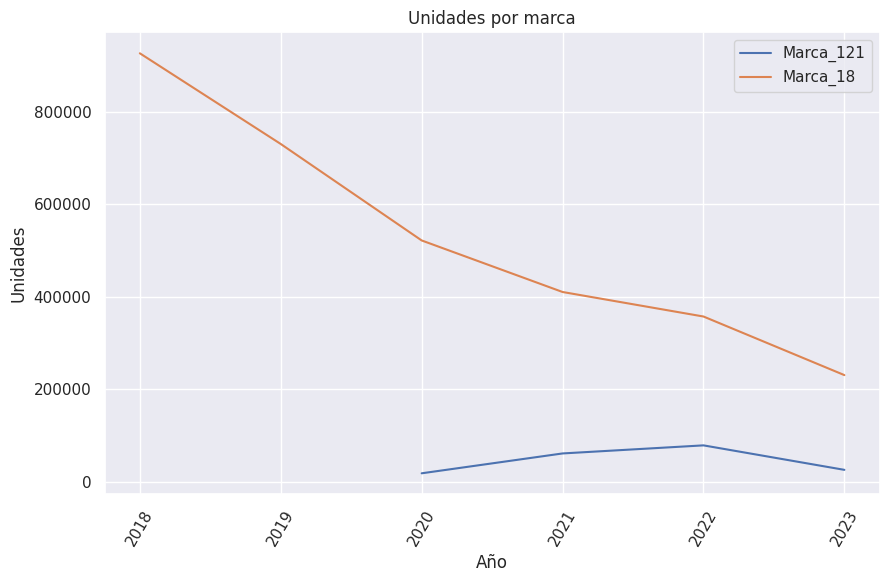

In [12]:
#@title Tendencia de ventas por año y marca en unidades
arr1 = datos2.groupby(['Marca', 'Año'])['Cantidad'].sum().reset_index()
arr1 = arr1.sort_values(by='Año')
plt.figure(figsize=(10, 6))
for category, data in arr1.groupby('Marca'):
    plt.plot(data['Año'], data['Cantidad'], label=category)
# Personalizar el gráfico
plt.xlabel('Año')
plt.ylabel('Unidades')
plt.title('Unidades por marca')
plt.legend()
plt.yticks(rotation=0)
plt.xticks(rotation=60)
# Mostrar el gráfico
plt.show()

**En base a los datos de unidades por año y al grafico representantivo se advierte una disminucion de las ventas con el transcurrir de los años.**

***La marca Marca_121 fue presentada en diciembre del año 2019. A comienzos del año 2020 es lanzada para su venta.***

#* Distribución de variables numéricas:

De la columna Cantidad se puede comprender que la cantidad maxima de unidades por pedido es de 9984, la cantidad minima de unidades en un pedido es 1, siendo el promedio de unidades por pedido unas 39.44.

Sobre los descuentos podemos concluir que el maximo descuento otorgado es de un 67.6 %, siendo la media de 15.38 %. Por politicas de compliance los descuentos no son negociables y forman parte del contexto ya mencionado.

Lo interesante es ver que hay pedidos con hasta 52 lineas por pedidos que es el maximo de articulos disponibles de la organizacion, siendo la media cerca de 3 lineas por pedido

Los precios no son objeto de investigacion por el momento.


In [13]:
datos2.describe()#Reflejo de lo descrito arriba

,Cantidad,Descuento,Precio,lineas_pedido,Año,Mes
count,85228.000000,85228.000000,85228.000000,85228.000000,85228.000000,85228.000000
mean,39.441404,15.375584,85.488667,2.910839,2020.363343,6.230628
std,170.183428,5.764756,622.617295,2.214541,1.579133,3.324998
min,1.000000,0.000000,0.000000,1.000000,2018.000000,1.000000
25%,10.000000,15.000000,0.000000,1.000000,2019.000000,4.000000
50%,20.000000,15.000000,0.000000,2.000000,2020.000000,6.000000
75%,40.000000,15.000000,0.000000,4.000000,2022.000000,9.000000
max,9984.000000,67.600000,9008.820000,52.000000,2023.000000,12.000000


<Axes: xlabel='lineas_pedido', ylabel='Cantidad'>

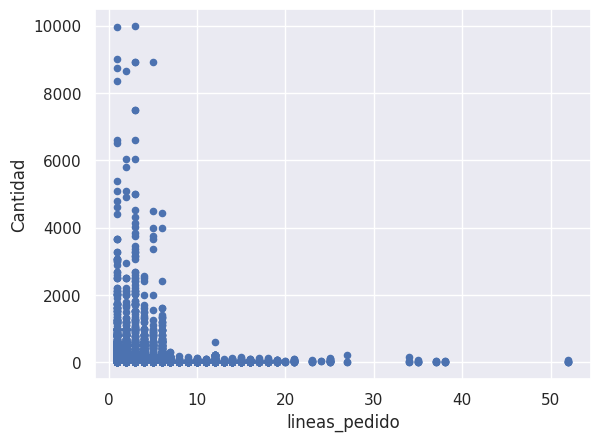

In [14]:
#@title Con estos gráficos detecto que son pocos los pedidos que tienen muchas lineas(articulos diferentes dentro de un mismo pedido) y son pocos pedidos con muchas unidades en pocas lineas de pedido.
datos2.plot.scatter(y="Cantidad",x="lineas_pedido")

#Análisis de categorías:
### Se proceden a examinar los volumenes de ventas en unidades y en cantidad de pedidos en los cuales participan las marcas.

***A continuacion se da un panorama del nivel de ventas aperturado por diferentes criterios, por marca, por provicina, por ciudades, etc.:***

<Axes: >

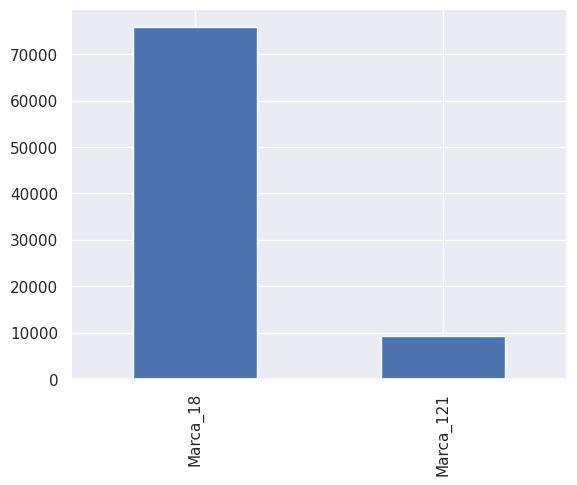

In [20]:
#@title Cantidad de pedidos con ventas por Marca (La marca "Marca_18" tiene la mayor cantidad de ventas frente a la marca "Marca_121")
ser1 = datos2.Marca.value_counts()
ser1.plot.bar()

In [21]:
#@title Distribución de cantidad de pedidos por Provincia (CABA se cuenta como distrito aparte)
datos2['Provincia'].value_counts() #Exploro el ranking de cantidad de registros por provincia


CIUDAD AUTONOMA DE BUENOS AIRES    21003
SANTA FE                           20951
BUENOS AIRES                       20322
CORDOBA                            12659
TUCUMAN                             5235
SALTA                               3416
MENDOZA                             1642
Name: Provincia, dtype: int64

<Axes: ylabel='Provincia'>

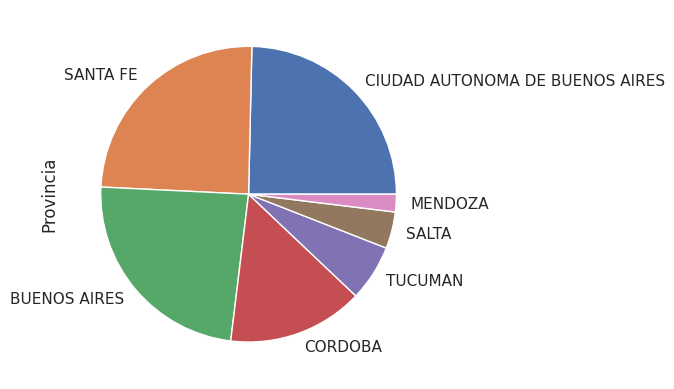

In [22]:
#@title Distribución de las ventas por Provincia (CABA se cuenta como distrito aparte)
ser1 = datos2.Provincia.value_counts()
ser1.plot.pie()

In [23]:
#@title Distribución de las ventas por Ciudad
datos2['Ciudad'].value_counts() #Exploro el ranking de cantidad de registros por ciudad
#DataFrameGroupBy.sum(numeric_only=False, min_count=0, engine=None, engine_kwargs=None)[source]
#datos6 = datos2['Ciudad'].value_counts() #Exploro el ranking de cantidad de registros por ciudad
#datos6


CIUDAD AUTONOMA DE BUENOS AIRES    21003
ROSARIO                            15278
CORDOBA                            12659
LA PLATA                           10146
MAR DEL PLATA                       6416
SANTA FE                            5673
SAN MIGUEL DE TUCUMAN               5235
BAHIA BLANCA                        3760
SALTA                               3416
MENDOZA                             1642
Name: Ciudad, dtype: int64

<Axes: >

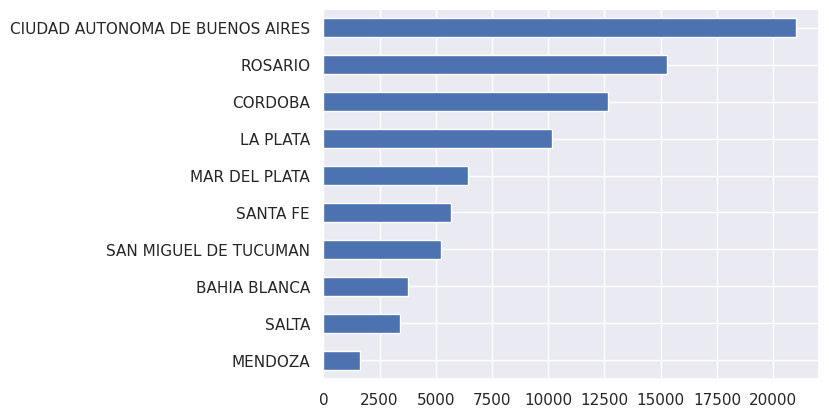

In [24]:
#@title Distribución de las ventas por Ciudad
ser1 = datos2.Ciudad.value_counts()
ser1 = ser1.sort_values(ascending=True)
ser1.plot.barh()

# Preparo el Modelo de predicción


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


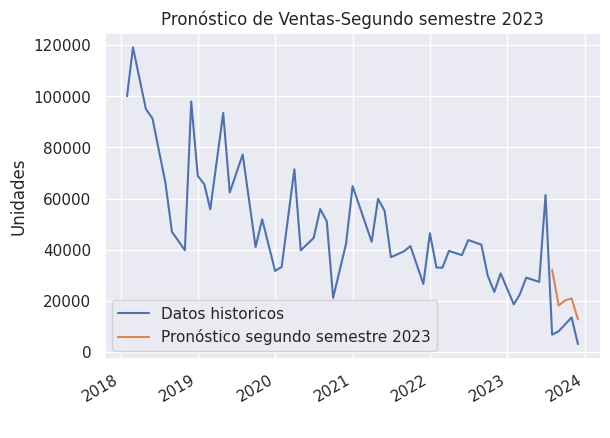

In [ ]:
#@title Predición segundo semestre 2023
# tomar de datos originales dias 29-oct, 30-oct, y 31-oct
df_mon_to_fri.plot()

# agregar bandas de confianza
pred_1_2_conf = results.get_forecast(steps=5).conf_int()
pred_1_2_conf.index = pd.date_range(start='07/1/2023', end='12/31/2023', freq='m')[:-1]
x = pd.date_range(start='07/1/2023', end='12/31/2023', freq='m')[:-1]
y1 = pred_1_2_conf['lower Cantidad']
y2 = pred_1_2_conf['upper Cantidad']
#plt.fill_between(x, y1, y2, alpha=0.6)

## predecir para 1-nov y 2-nov
pred_1_2 = results.get_forecast(steps=5).predicted_mean
pred_1_2.index = pd.date_range(start='07/1/2023', end='12/31/2023', freq='m')[:-1]
pred_1_2.plot()

## formato de la grafica final
plt.title('Pronóstico de Ventas-Segundo semestre 2023')
plt.ylabel('Unidades')
# plt.xlabel('Semana lun-29-oct al vie-02-nov')
plt.xlabel(' ')
plt.legend(('Datos historicos', 'Pronóstico segundo semestre 2023'),
           loc='lower left')
plt.savefig('pronostico.png', dpi=200)
plt.show()

# Conclusiones

## Como se puede apreciar, la tendencia de ventas a lo largo de los ultimos 5 años esta en baja.
## El pronostico de ventas para el segundo semestre del año 2023 sigue la misma tendencia en baja.

### Se requiere analizar diferentes factores que afectan a las ventas dada la tendencia.